# Import Libraries

In [94]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import collections
import operator
import imageio
from sklearn import linear_model
from functools import reduce

# Get Train Images & Assign Id

In [95]:
# AWS directory
# train_directory = '../simpsons_train_scaled'

# Local directory
train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled'

classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))
class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 0,
 'agnes_skinner': 1,
 'apu_nahasapeemapetilon': 2,
 'barney_gumble': 3,
 'bart_simpson': 4,
 'bumblebee_man': 5,
 'carl_carlson': 6,
 'charles_montgomery_burns': 7,
 'chief_wiggum': 8,
 'cletus_spuckler': 9,
 'comic_book_guy': 10,
 'disco_stu': 11,
 'edna_krabappel': 12,
 'fat_tony': 13,
 'gil': 14,
 'groundskeeper_willie': 15,
 'hans_moleman': 16,
 'helen_lovejoy': 17,
 'homer_simpson': 18,
 'jasper_beardly': 19,
 'jimbo_jones': 20,
 'kent_brockman': 21,
 'krusty_the_clown': 22,
 'lenny_leonard': 23,
 'lionel_hutz': 24,
 'lisa_simpson': 25,
 'maggie_simpson': 26,
 'marge_simpson': 27,
 'martin_prince': 28,
 'mayor_quimby': 29,
 'milhouse_van_houten': 30,
 'miss_hoover': 31,
 'moe_szyslak': 32,
 'ned_flanders': 33,
 'nelson_muntz': 34,
 'otto_mann': 35,
 'patty_bouvier': 36,
 'principal_skinner': 37,
 'professor_john_frink': 38,
 'rainier_wolfcastle': 39,
 'ralph_wiggum': 40,
 'selma_bouvier': 41,
 'sideshow_bob': 42,
 'sideshow_mel': 43,
 'snake_jailbird'

In [96]:
totalClasses = 3
# totalPicsPerClass = 3

def getDirs(main):
    classes = os.listdir(main)[0:totalClasses]
    combo = []
    [combo.append([class_dict[clas], clas, main + '/' + clas]) for clas in classes]
    return(combo)

def getPics(directory):
    pics = os.listdir(directory)#[0:totalPicsPerClass]
    picPath = [directory + '/' + pic for pic in pics]
    return(picPath)

def readImage(imagePath):
    pix = imageio.imread(imagePath)
    return(pix)

imageDirs = getDirs(train_directory)
s = list(map(lambda x: [x[0], x[1], getPics(x[2])], imageDirs))

trainPix = []
for arr in s:
    for picArray in arr[2]:
        pix = readImage(picArray)
        trainPix.append([arr[0], arr[1], pix])

In [97]:
len(trainPix)

1578

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


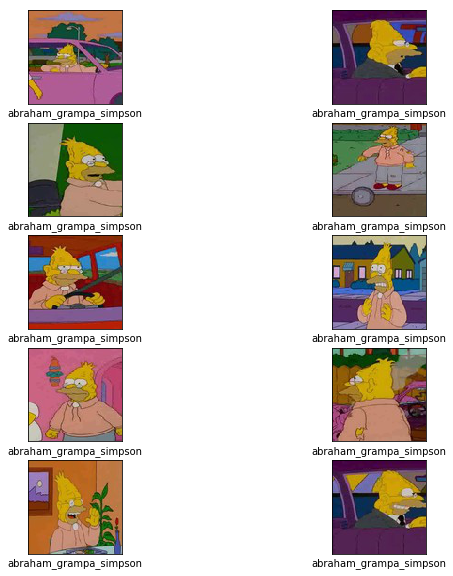

In [98]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPix[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPix[i][2], cmap=plt.cm.binary)
    plt.xlabel(trainPix[i][1])

# PreProcess RGB values from 0 to 1

In [99]:
def preProcess(obj):
    for i in range(len(obj)):
        obj[i][2] = obj[i][2]/255
        
preProcess(trainPix)

In [100]:
labels = list(map(lambda x: x[0], trainPix))
images = list(map(lambda x: x[2], trainPix))

In [101]:
labels = np.array(labels)
images = np.array(images)
labels.shape, images.shape

((1578,), (1578, 100, 100, 3))

## Grab sample (all for AWS) and shuffle  and flatten data

In [102]:
model_classes = totalClasses

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

((20933, 30000), (20933,), (990, 30000), (990,))

# Create Multinomial Logistic Regression Model

In [103]:
regr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

# Fit Model to training data

In [104]:
model.fit(images, labels, epochs=10)

Epoch 1/10
1578/1578 [==============================] - 9s 6ms/step - loss: 1.0317 - acc: 0.6584
Epoch 2/10
1578/1578 [==============================] - 5s 3ms/step - loss: 0.8914 - acc: 0.7605A: 3
Epoch 3/10
1578/1578 [==============================] - 4s 3ms/step - loss: 0.7600 - acc: 0.8162
Epoch 4/10
1578/1578 [==============================] - 4s 3ms/step - loss: 0.6832 - acc: 0.8612
Epoch 5/10
1578/1578 [==============================] - 4s 3ms/step - loss: 0.3754 - acc: 0.8733
Epoch 6/10
1578/1578 [==============================] - 4s 2ms/step - loss: 0.3533 - acc: 0.8714
Epoch 7/10
1578/1578 [==============================] - 3s 2ms/step - loss: 0.3684 - acc: 0.8536
Epoch 8/10
1578/1578 [==============================] - 6s 4ms/step - loss: 0.2453 - acc: 0.9106
Epoch 9/10
1578/1578 [==============================] - 5s 3ms/step - loss: 0.2294 - acc: 0.9259
Epoch 10/10
1578/1578 [==============================] - 4s 3ms/step - loss: 0.2365 - acc: 0.9214


# Predict on test data

In [105]:
# Get all test images into a similar format given the one directory they are all in

# AWS directory
# test_directory = '../simpsons_test_scaled'

# Local directory
test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

test_pics = os.listdir(test_directory)

def getClass(pic):
    if pic != '.DS_Store':
        character = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        return(character)

classes = list(map(lambda x: x[1], trainPix))
classes = np.array(classes)
uClasses = np.unique(classes)
    
test = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = imageio.imread(path)
        character_label = getClass(pic)
        if character_label == uClasses[0] or character_label == uClasses[1] or character_label == uClasses[2]:
            test.append([class_dict[character_label], character_label, pix_array])

In [106]:
 uClasses, np.unique(np.array(list(map(lambda x: x[1], test))))

(array(['abraham_grampa_simpson', 'agnes_skinner',
        'apu_nahasapeemapetilon'], dtype='<U22'),
 array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon'], dtype='<U22'))

In [107]:
test_images = list(map(lambda x: x[2], test))
test_images = np.array(test_images)

test_labels = list(map(lambda x: x[0], test))
test_labels = np.array(test_labels)

test_labels.shape, test_images.shape

((98,), (98, 100, 100, 3))

In [108]:
regr.score(testIms, testLabs)

98/98 [==============================] - 1s 6ms/step
Test accuracy: 0.9693877551020408
